### Load libraries
___

In [7]:
import numpy as np
import pandas as pd
import math, copy
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

### Define auxiliary functions

#### compute_model_output
___

In [8]:
def compute_model_output(x, w, b):
  m = x.shape[0]
  f_wb = np.zeros(m)
  for i in range(m):
    f_wb[i] = w * x[i] + b
  return f_wb

#### compute_cost
___

In [9]:
def compute_cost(x, y, w, b): 
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0.0
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

#### compute_gradient
___

In [10]:
def compute_gradient(x, y, w, b): 
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

#### gradient_descent
___

In [11]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters 
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

#### Load data
___

In [12]:
my_data = pd.read_csv('./data/data.txt')
my_data.head()

,Size,Rooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [13]:
x_train = my_data['Size'].values.astype('double')
y_train = my_data['Price'].values.astype('double')
# print(f"x_train: {x_train}")
# print(f"y_train: {y_train}")

In [14]:
m = x_train.shape[0]
print(f"This data set has {m} entries")

This data set has 47 entries


#### Data exploration
___

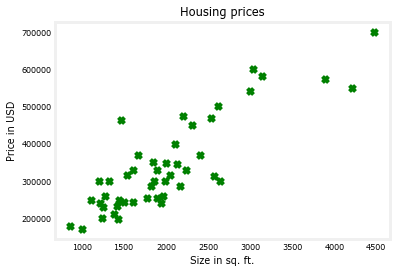

In [15]:
plt.scatter(x_train, y_train, marker='x', c='g')
plt.title("Housing prices")
plt.ylabel("Price in USD")
plt.xlabel("Size in sq. ft.")
plt.show()

#### Initial w & b values
___
We plot a potential line to see how things are looking for our data.

In [16]:
w = 100
b = 100

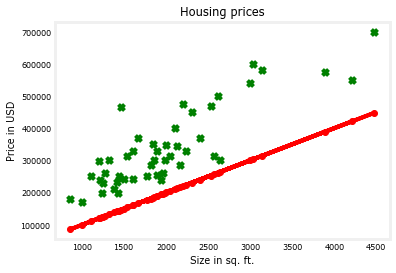

In [17]:
f_wb = compute_model_output(x_train, w, b)
plt.scatter(x_train, y_train, marker='x', c='g', label='Actual values')
plt.plot(x_train, f_wb, marker='o', c='r', label='The model prediction')
plt.title("Housing prices")
plt.ylabel("Price in USD")
plt.xlabel("Size in sq. ft.")
plt.show()

### Run Gradient descent
___

#### Scale data to avoid overflow

In [18]:
factor = 1000
x_train = np.array(list(map(lambda t : t/factor,x_train)))
y_train = np.array(list(map(lambda t : t/factor,y_train)))

In [19]:
# initialize parameters
w_init = 0.0
b_init = 0.0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 5.88e+04  dj_dw: -7.642e+02, dj_db: -3.404e+02   w:  7.642e+00, b: 3.40413e+00
Iteration 1000: Cost 2.06e+03  dj_dw:  1.567e-01, dj_db: -3.531e-01   w:  1.359e+02, b: 6.81270e+01
Iteration 2000: Cost 2.06e+03  dj_dw:  5.099e-02, dj_db: -1.149e-01   w:  1.350e+02, b: 7.02476e+01
Iteration 3000: Cost 2.06e+03  dj_dw:  1.659e-02, dj_db: -3.739e-02   w:  1.347e+02, b: 7.09377e+01
Iteration 4000: Cost 2.06e+03  dj_dw:  5.399e-03, dj_db: -1.217e-02   w:  1.346e+02, b: 7.11622e+01
Iteration 5000: Cost 2.06e+03  dj_dw:  1.757e-03, dj_db: -3.959e-03   w:  1.345e+02, b: 7.12353e+01
Iteration 6000: Cost 2.06e+03  dj_dw:  5.716e-04, dj_db: -1.288e-03   w:  1.345e+02, b: 7.12590e+01
Iteration 7000: Cost 2.06e+03  dj_dw:  1.860e-04, dj_db: -4.192e-04   w:  1.345e+02, b: 7.12668e+01
Iteration 8000: Cost 2.06e+03  dj_dw:  6.052e-05, dj_db: -1.364e-04   w:  1.345e+02, b: 7.12693e+01
Iteration 9000: Cost 2.06e+03  dj_dw:  1.969e-05, dj_db: -4.438e-05   w:  1.345e+02, b: 7.12701e+01


#### Prediction
___

In [20]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 205.8 Thousand dollars
1200 sqft house prediction 232.7 Thousand dollars
2000 sqft house prediction 340.3 Thousand dollars
